In [3]:
from os import chdir
chdir('..')

In [15]:
# import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
%matplotlib notebook
sns.set(font_scale=1.1)
current_palette = sns.color_palette()

In [5]:
df = pd.read_csv('./test_fixtures/results/all_timings.csv')
df = df.replace('migloveholes', 'miglove')
df_all_section = df[df.section == 'all']
df_pl = df[df.alg == 'polylidar']
df_pl_sec = df_pl[df_pl.section != 'all']
df.head()

,alg,holes,l2_norm,points,section,shape,time
0,polylidar,True,NaN,2000,delaunay,miglove,1.198
1,polylidar,True,NaN,2000,delaunay,miglove,0.820
2,polylidar,True,NaN,2000,delaunay,miglove,0.757
3,polylidar,True,NaN,2000,delaunay,miglove,0.759
4,polylidar,True,NaN,2000,delaunay,miglove,0.966


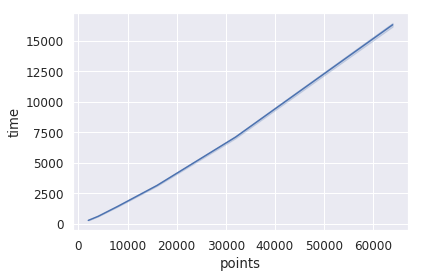

In [11]:
# df = pd.DataFrame.from_records(records)
df_m = df[df.alg == 'spatialite']
# df_m = pd.melt(df, id_vars =['points'], value_vars =['alg']) 
sns.lineplot(x='points', y='time',  data=df_m)

<IPython.core.display.Javascript object>


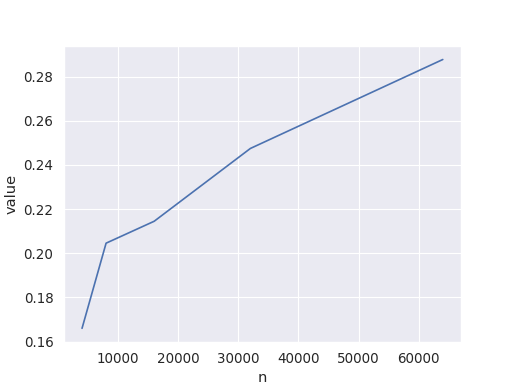

In [18]:
df_means = df_m.groupby(['points']).mean()
df_means['ns'] = df_means.index
df_diff = df_means.diff()
df_diff

numerator = df_diff[['time']].values
denominator = df_diff['ns'].values
data = numerator / denominator[:,None]
data = np.concatenate((data, df_means.ns.values[:,None]), axis=1)
df1 = pd.DataFrame(data=data, columns=['time', 'n'])
df1
df1_m = pd.melt(df1, id_vars =['n'], value_vars =['time']) 
sns.lineplot(x='n', y='value', data=df1_m)